In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


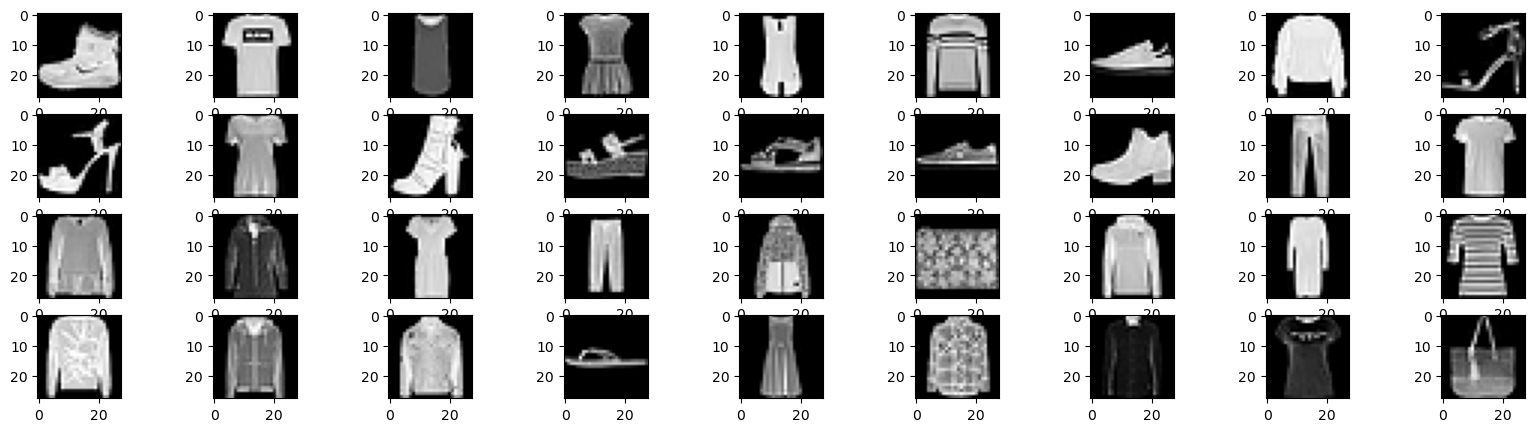

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(np.unique(y_train, return_counts = True)) 

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)   

plt.figure(figsize=(20,5))
for i in range(36):
    plt.subplot(4, 9, i+1, xticks=[], yticks=[]) # plt.axis('off')
    plt.imshow(x_train[i], 'gray')       

# ---------- 전처리 (4차원으로 변환) ---------- #
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28, 1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)  

# 2. 모델


In [28]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(2,2), input_shape=(28,28,1), padding='same', activation='relu'))  # output shape = 28, 28, 128
model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))     
model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))                    
model.add(Conv2D(filters=16, kernel_size=(2,2), activation='relu'))                                                                           
model.add(Conv2D(filters=8, kernel_size=(2,2), activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        16448     
                                                                 
 conv2d_32 (Conv2D)          (None, 27, 27, 32)        8224      
                                                                 
 conv2d_33 (Conv2D)          (None, 26, 26, 16)        2064      
                                                                 
 conv2d_34 (Conv2D)          (None, 25, 25, 8)         520       
                                                                 
 dense_12 (Dense)            (None, 25, 25, 16)        144       
                                                                 
 dense_13 (Dense)            (None, 25, 25, 10)       

# 3. 컴파일 및 훈련

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc') # one-hot encoding 하지 않아도 되는 데이터이므로 loss= sparse_categorical_crossentropy

path = 'C:/study/keras/keras_save/MCP/'
MCP = ModelCheckpoint(monitor='acc', mode='auto', save_best_only=True, filepath=path+'keras35_2_fashion.hdf5') 
ES = EarlyStopping(monitor='acc', mode='auto', patience=4, restore_best_weights=True) 
model.fit(x_train, y_train, epochs=64, batch_size=1024, validation_split=0.2, callbacks=[ES, MCP])

Epoch 1/64


ValueError: in user code:

    File "c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None,) and (None, 25, 25, 10) are incompatible


# 4. 평가 및 예측

In [ ]:
metric = model.evaluate(x_test, y_test) # compile에서 metrics = acc를 지정했으므로 evaluate는 값을 배열 형태로 2개 반환함
print('loss: ', metric[0], 'acc: ', metric[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3685 - acc: 0.8916
loss:  0.3685457408428192 acc:  0.8916000127792358
